In [56]:
import tensorflow as tf
from tensorflow import keras                    
import numpy as np
import tensorflow_hub as hub
print(tf.__version__)

1.14.0


In [64]:
imdb=keras.datasets.imdb
(train_data,train_labels),(test_data, test_labels)=imdb.load_data(num_words=10000)


In [65]:
word_index=imdb.get_word_index()


In [66]:
print("Training entries: {}, labels: {}". format(len(train_data),len(train_labels)))

Training entries: 25000, labels: 25000


In [67]:
word_index={k:(v+3) for k,v in word_index.items()}
#Reserved Words
word_index['<PAD>']=0
word_index['<START>']=1
word_index['<UNK>']=2
word_index['<UNUSED>']=3

reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
def decode_review(text):
    return ' '.join([reverse_word_index.get(i,'?') for i in text])


In [68]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [69]:
train_data=keras.preprocessing.sequence.pad_sequences(train_data, 
                                                      value=word_index["<PAD>"], 
                                                      padding='post', maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post', maxlen=256)

In [70]:
vocab_size=10000

model=keras.Sequential()
model.add(keras.layers.Embedding(vocab_size,16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1,activation=tf.nn.sigmoid))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.compile(optimizer=tf.train.AdamOptimizer(), loss='binary_crossentropy',
             metrics=['accuracy'])


In [72]:
x_val=train_data[:10000]
partial_x_train = train_data[10000:]

y_val= train_labels[:10000]
partial_y_train=train_labels[10000:]

In [73]:
history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=40,
                 batch_size=512,
                 validation_data=(x_val,y_val),
                 verbose=1)



Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 4s 265us/sample - loss: 0.6914 - acc: 0.5193 - val_loss: 0.6890 - val_acc: 0.5638
Epoch 2/40
15000/15000 [==============================] - 1s 70us/sample - loss: 0.6840 - acc: 0.6257 - val_loss: 0.6795 - val_acc: 0.6415
Epoch 3/40
15000/15000 [==============================] - 1s 70us/sample - loss: 0.6696 - acc: 0.6949 - val_loss: 0.6626 - val_acc: 0.7146
Epoch 4/40
15000/15000 [==============================] - 1s 71us/sample - loss: 0.6463 - acc: 0.7369 - val_loss: 0.6364 - val_acc: 0.7648
Epoch 5/40
15000/15000 [==============================] - 1s 69us/sample - loss: 0.6125 - acc: 0.7867 - val_loss: 0.6013 - val_acc: 0.7889
Epoch 6/40
15000/15000 [==============================] - 1s 69us/sample - loss: 0.5699 - acc: 0.8179 - val_loss: 0.5606 - val_acc: 0.8029
Epoch 7/40
15000/15000 [==============================] - 1s 68us/sample - loss: 0.5223 - acc: 0.8331 - val_loss: 0

In [74]:
model.evaluate(test_data,test_labels)

25000/25000 [==============================] - 1s 43us/sample - loss: 0.3343 - acc: 0.8707


[0.3342530643081665, 0.87068]

In [75]:
model.predict(test_data)
rand_review=np.random.randint(10000, size=256)
biased_review=np.full(256,531)

In [55]:
test_data=np.append(test_data,[rand_review],axis=0)
test_data=np.append(test_data,[biased_review],axis=0)
model.predict(test_data)

array([[0.08120653],
       [0.99909514],
       [0.6567853 ],
       ...,
       [1.        ],
       [0.34709793],
       [1.        ]], dtype=float32)

In [77]:
print(decode_review(rand_review))
print(decode_review(test_data[-1]))




brooding wherever lame jason smoothly notably sense mockery robbed comedians claimed continued hopeful reno sort insightful birthday recreation failure comparison plotted millions string weirdo remainder teenager incredibly scared directions nerdy proof prejudices intrigue guard tyler studying garden thief voice peers compared othello training trains centers at banter national mentioned outright dwight woke documentaries masterpiece payne novels arrogance hostel rome we'll comics hats kansas spoofs destination splendid marcel deborah intentions annoyance kings yesterday dylan residents shelf known transferred lifts fodder cycle switching gothic poster remove seed principal gilliam positions remind greatly tide commentary martial legs poke if misfire saves really common somewhat hardly hat rko stretches combining telly wild lesbian quinn german rant claire imaginary beauty noted bullying greatest realised gere europeans lyrical duvall others horrible sullivan photographed prom remark mu

In [78]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

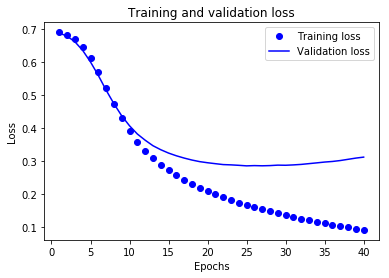

In [80]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

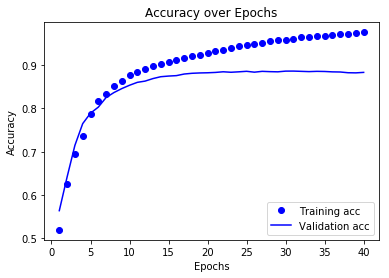

In [81]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()